$$ \LaTeX \text{ command declarations here.}
\newcommand{\R}{\mathbb{R}}
\renewcommand{\vec}[1]{\mathbf{#1}}
$$

In [1]:
# plotting
%matplotlib inline
from matplotlib import pyplot as plt;

# scientific
import numpy as np;

In [2]:
from notebook.services.config import ConfigManager
cm = ConfigManager()
cm.update('livereveal', {
              'theme': 'simple',
              'transition': 'none',
              'start_slideshow_at': 'beginning',
});

# EECS 545:  Machine Learning
## Lecture 04:  Linear Regression
* Instructor:  **Jacob Abernethy**
* Date:  January 20, 2015


*Lecture Exposition Credit: Benjamin Bray*

# Supervised Learning

- Goal
    - Given data $X$ in feature sapce and the labels $Y$
    - Learn to predict $Y$ from $X$
- Labels could be discrete or continuous
    - Discrete-valued labels:  Classification
    - Continuous-valued labels:  Regression
    
<img src="images/classification-regression.png">

# Notation

In this lecture, we will use
- Data $x \in \R^D$ (scalar- or vector-valued)
- Features $\phi(x) \in \R^M$ for data $x$
- Continuous-valued labels $t \in \R$ (target values)

We will interchangeably use

- $x^{(n)}, x_n$ to denote the $n^\text{th}$ training example.
- $t^{(n)}, t_n$ to denote the $n^\text{th}$ target value.

------------------------------------------------------------------------------------------------
Note: 
- dim of data $dim(x)=D$
- dim of feature $dim(\phi(x))=M \neq D=dim(x)$

# Linear Regression (1d inputs)

- Consider 1d case (e.g. $dim(x)$=D=1, means data is only a scalor. If don't consider the polynomial, it would be simple OLS)
    - Given a set of observations $x_1, \dots, x_N$
    - and corresponding target values $t_1, \dots, t_N$
- We want to learn a function $y(x, \vec{w}) \approx t$ to predict future values.

$$
y(x, \vec{w})
= w_0 + w_1 x + w_2 x^2 + \dots w_M x^M
= \sum_{k=0}^M w_k x^k
$$

## Regression: Noisy Data

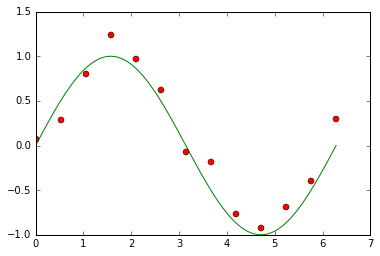

In [3]:
# plot sine wave
# np.linspace(0, 2*np.pi, n): return an array with n evenly spaced elements from 0 to 2*pi 
xx = np.linspace(0, 2*np.pi, 100);
# np.sin(array-like): return the array[sin(input array)]
# plt.plot(value of x axis, value of y axis, option of the plot)'-':solid line+'g': green='-g':solid green line 
plt.plot(xx, np.sin(xx), '-g');

# return 13 evenly spaced points from 0 to 2pi
x = np.linspace(0, 2*np.pi, 13);
# np.random.randn generates gaussian samples
# np.random: random sampling; randn: from std normal
# np.random.randn(size of the returned matrix): return a sampling matrix from standard normal
# x.shape: return the tuple show the dimension of x, e.g: if x is a matrix with size(2*5*7), x.shape returns (2,5,7)
# x.shape[0] means the 1st element of this tuple
y = np.sin(x) + np.random.randn(x.shape[0]) / 5; 

# plot data, 'o':circle mark, 'r':red
plt.plot(x,y, 'or');


## Regression:  0th Order Polynomial

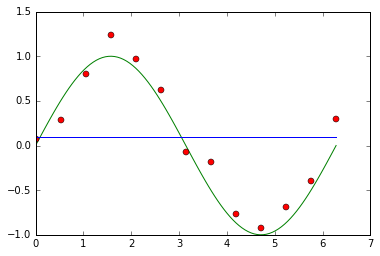

In [4]:
# Here were are going to take advantage of numpy's 'polyfit' function
# This implements a "polynomial fitting" algorithm
# coeffs are the optimal coefficients of the polynomial
# x = np.linspace(0, 2*np.pi, 13);
# y = np.sin(x) + np.random.randn(x.shape[0]) / 5; 
coeffs = np.polyfit(x, y, 0); # 0 is the degree of the poly

# We construct poly(), the polynomial with "learned" coefficients
# e.g np.poly1d([1,2,3])=1*(x^2)+2*(x^1)+3*(x^0)
poly = np.poly1d(coeffs);
# poly(a)=1*(a^2)+2*(a^1)+3*(a^0)
plt.plot(xx, np.sin(xx), "-g", x, y, "or", xx, poly(xx), "-b");

## Regression:  1st Order Polynomial

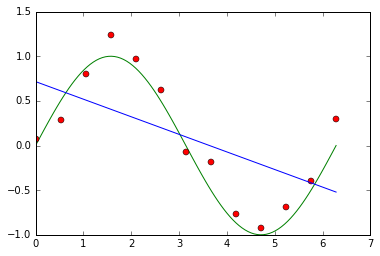

In [5]:
coeffs = np.polyfit(x, y, 1); # Now let's try degree = 1
poly = np.poly1d(coeffs);
plt.plot(xx, np.sin(xx), "-g", x, y, "or", xx, poly(xx), "-b");

## Regression:  3rd Order Polynomial

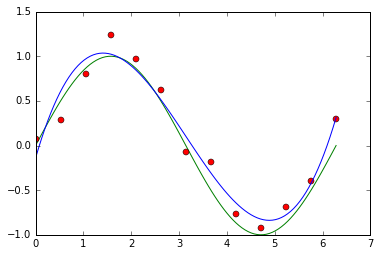

In [6]:
coeffs = np.polyfit(x, y, 3); # Now degree = 3
poly = np.poly1d(coeffs);
plt.plot(xx, np.sin(xx), "-g", x, y, "or", xx, poly(xx), "-b");



## Linear Regression (General Case)

The function $y(\vec{x}, \vec{w})$ is linear in parameters $\vec{w}$.
- **Goal:** Find the best value for the weights, $\vec{w}$.
- For simplicity, add a **bias term** $\phi_0(\vec{x}) = 1$.

$$
y(\vec{x}, \vec{w}) 
= w_0 + \sum_{j=0}^{M-1} w_j \phi_j(\vec{x})
= \vec{w}^T \phi(\vec{x})
$$

----------------------------------------------------------------------------------------------------------
Note: $x$ is not $\phi(x)$! We can have $\phi(x)$ as all different kind of function (such as sigmoid or logistic or normal , etc. See the graph below!)
And $dim(x)=D$ and $dim(\phi(x))=M$. $\phi(): \mathbf{R^D} \to \mathbf{R^M}$ That's why the summation of $y(\vec(x),\vec(w))$ from zero to M

## Basis Functions

The basis functions $\phi_j(\vec{x})$ need not be linear.

In [10]:
def set_nice_plot_labels(axs):
    axs[0].set_title(r"$ \phi_j(x) = x^j$", fontsize=18, y=1.08);
    axs[0].set_xlabel("Polynomial", fontsize=18);
    axs[1].set_title(r"$ \phi_j(x) = \exp\left( - \frac{(x-\mu_j)^2}{2s^2} \right)$", fontsize=18, y=1.08);
    axs[1].set_xlabel("Gaussian", fontsize=18);
    axs[2].set_title(r"$ \phi_j(x) = (1  + \exp\left(\frac{\mu_j-x}{s}\right))^{-1}$", fontsize=18, y=1.08);
    axs[2].set_xlabel("Sigmoid", fontsize=18);

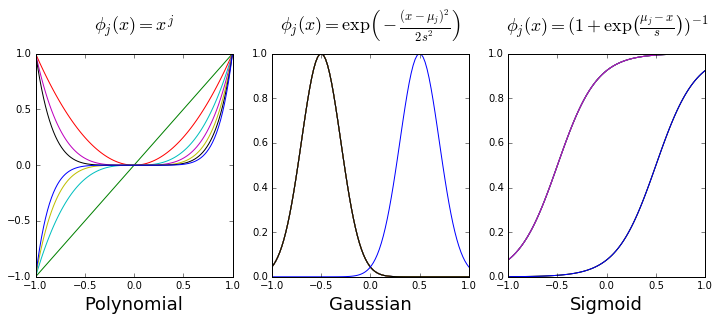

In [11]:
x = np.linspace(-1,1,100);
f, axs = plt.subplots(1, 3, sharex=True, figsize=(12,4));
for j in range(8):
    axs[0].plot(x, np.power(x,j));
    axs[1].plot(x, np.exp( - (x - j/7 + 0.5)**2 / 2*5**2 ));
    axs[2].plot(x, 1 / (1 + np.exp( - (x - j/5 + 0.5) * 5)) );
    
set_nice_plot_labels(axs) # I'm hiding some helper code that adds labels

## Least Squares:  Objective Function

Minimize the residual error over the training data.


$$
\text{residual error over the training data} =E(\vec{w}) 
= \frac12 \sum_{n=1}^N (y(x_n, \vec{w}) - t_n)^2
= \frac12 \sum_{n=1}^N \left( \sum_{j=0}^{M-1} w_j\phi_j(\vec{x}^{(n)}) - t^{(n)} \right)^2
$$

where E(.) here is **NOT** expectation. It is **Error Function**. 
$$
y(\vec{x}, \vec{w}) 
= w_0 + \sum_{j=0}^{M-1} w_j \phi_j(\vec{x})
= \vec{w}^T \phi(\vec{x})
$$

<img src="images/least-squares-objective.png">


## Least Squares:  Gradient Calculation

To minimize the error, take partial derivatives w.r.t. each weight $w_j$:

$$
\frac{\partial E(\vec{w})}{\partial w_k}= \frac{\partial}{\partial w_k} \left[ 
    \frac12 \sum_{n=1}^N \left( \sum_{j=0}^{M-1} w_j\phi_j(\vec{x}^{(n)}) - t^{(n)} \right)^2
    \right]
    =\frac{\partial}{\partial w_k} \left[ \frac12 \sum_{n=1}^N \left( \vec{w^{\top}} \vec{\phi(\vec{x^{(i)}})} - t^{(i)} \right)^2  \right]
$$
where 
$$
\vec{w^{\top}}=(w_0, w_1, w_2, \cdots w_{M-1})\\
\vec{\phi(\vec{x^{(i)}})}^{\top}=(\phi_0(\vec{x^{(i)}}), \phi_1(\vec{x^{(i)}}), \phi_2(\vec{x^{(i)}}), \cdots \phi_{M-1}(\vec{x^{(i)}}))
$$

Apply the chain rule:

$$
= \sum_{n=1}^N \left[ \left( \sum_{j=0}^{M-1} w_j\phi_j(\vec{x}^{(n)}) - t^{(n)} \right)
  \frac{\partial}{\partial w_k}  \left[ \sum_{j=0}^{M-1} w_j\phi_j(\vec{x}^{(n)}) - t^{(n)} \right] \right]
$$

$$
= \sum_{n=1}^N \left[ 
    \left( \sum_{j=0}^{M-1} w_j\phi_j(\vec{x}^{(n)}) - t^{(n)} \right)
    \phi_k(\vec{x}^{(n)}) 
  \right]
  =\sum_{n=1}^N \left[ \left( \vec{w^{\top}} \vec{\phi(\vec{x^{(i)}})} - t^{(i)} \right) \left( \phi_k(\vec{x}^{(n)})\right) \right]
$$

Cautious: Since we only get the partial derivative with respect to $w_k$, we can only get one equation. In fact, there should be M equation, $k=0,1,2 ...., M-1$
We can use the gradient to show this. (next slide)

## Least Squares:  Vectorized Gradient

$$
\begin{align}
\nabla_w E(\vec{w})
&= \sum_{n=1}^N \left( \sum_{j=0}^{M-1} w_j \phi_j(\vec{x}^{(n)}) - t^{(n)} \right) \phi(\vec{x}^{(n)}) \\
&= \sum_{n=1}^N \left( \vec{w}^T \phi(\vec{x}^{(n)}) - t^{(n)} \right) \phi(\vec{x}^{(n)})
\end{align}
$$

p.s.
$$
dim(\nabla_w E(\vec{w})): M \times 1
$$

## Batch Gradient Descent

Given dataset $\{ (x,t) \}$ and initial guess $\vec{w}_0$, repeat until convergence:

- $\vec{w} = \vec{w} - \eta \nabla_\vec{w} E(\vec{w})$

where

$$
\begin{align}
\nabla_w E(\vec{w})
&= \sum_{n=1}^N \left( \sum_{j=0}^{M-1} w_j \phi_j(\vec{x}^{(n)}) - t^{(n)} \right) \phi(\vec{x}^{(n)}) \\
&= \sum_{n=1}^N \left( \vec{w}^T \phi(\vec{x}^{(n)}) - t^{(n)} \right) \phi(\vec{x}^{(n)})
\end{align}
$$

## Stochastic Gradient Descent

**Main Idea:**  Instead of computing batch gradient (over entire training data), just compute gradient for individual example and update.

**Repeat** until convergence:
- `for` $n=1,\dots,N$ `do:` <br>
    - $w := w - \eta \nabla_\vec{w} E(\vec{w} | \vec{x}^{(n)})$
    
where

$$
\begin{align}
\nabla_w E(\vec{w} | \vec{x}^{(n)})
&= \left( \sum_{j=0}^{M-1} w_j \phi_j(\vec{x}^{(n)}) - t^{(n)} \right) \phi(\vec{x}^{(n)}) \\
&= \left( \vec{w}^T \phi(\vec{x}^{(n)}) - t^{(n)} \right) \phi(\vec{x}^{(n)})
\end{align}
$$

-----------------------------------------------------------------------
Notes:
following problem:
1. which data should we choose? random selection
2. how much step should we update? This is a hundres of PhD paper.

## Closed Form Solution

**Main Idea:**  Compute gradient and set to gradient to zero, solving in closed form.
- Objective function:  $$E(\vec{w}) = \frac12 \sum_{n=1}^N \left( \sum_{j=0}^{M-1} w_j\phi_j(\vec{x}^{(n)})\right)^2$$
- We will derive the gradient using matrix calculus.

### Closed Form Solution:  Derivation

$$
\begin{align}
E(\vec{w}) 
&=  \frac12 \sum_{n=1}^N \left( 
        \sum_{j=1}^{M-1} 
           w_j \phi_j(\vec{x}^{(n)}) - t^{(n)} 
    \right)^2 \\
&=  \frac12 \sum_{n=1}^N \left(
        \vec{w}^T \phi(\vec{x}^n) - t^{(n)}
    \right)^2 \\
&= \frac12 \sum_{n=1}^N  (\vec{w}^T \phi( \vec{x}^{(n)} ) )^2
 -         \sum_{n=1}^N  t^{(n)} \vec{w}^T \phi( \vec{x}^{(n)} )
 + \frac12 \sum_{n=1}^N  (t^{(n)})^2 \\
&= \frac12 \vec{w}^T \Phi^T \Phi \vec{w} - \vec{w}^T \Phi^T \vec{t} + \frac12 \vec{t}^T \vec{t}
\end{align}$$

## Closed Form Solution:  Data Matrix

The **design matrix** is a matrix $\Phi \in \R^{N \times M}$, applying
- the $M$ basis functions (columns)
- to $N$ data points (rows)

$$
\Phi = \begin{bmatrix}
\phi_0(\vec{x}_1) & \phi_1(\vec{x}_1) & \cdots & \phi_{M-1}(\vec{x}_1) \\
\phi_0(\vec{x}_2) & \phi_1(\vec{x}_2) & \cdots & \phi_{M-1}(\vec{x}_2) \\
\vdots & \vdots & \ddots & \vdots \\
\phi_0(\vec{x}_N) & \phi_1(\vec{x}_N) & \cdots & \phi_{M-1}(\vec{x}_N) \\
\end{bmatrix}=\begin{bmatrix}
\phi(\vec{x}_1)^{\top}\\
\phi(\vec{x}_2)^{\top}\\
\phi(\vec{x}_3)^{\top}\\
\vdots\\
\phi(\vec{x}_N)^{\top}
\end{bmatrix}
$$

**Goal:** $\Phi \vec{w} \approx \vec{t}$

## Closed Form:  Recap

- Idea so far:
    - Compute gradient and set to zero
    - Solve the equation in a closed form using matrix calculus
- Need to compute the first derivative of objective $E(\vec{w})$ in matrix form!

## Matrix Calculus:  The Gradient

Suppose that $f : \R^{m \times n} \mapsto \R$, that is, the function $f$
- takes as input a matrix $A \in \R^{m\times n} = [a_{ij}]$
- returns a real value

Then, the **gradient** of $f$ with respect to $A$ is:

$$
\nabla_A f(A) \in \R^{m \times n} = \begin{bmatrix}
%
\frac{\partial f}{\partial a_{11}}
    & \frac{\partial f}{\partial a_{12}} 
    & \cdots 
    & \frac{\partial f}{\partial a_{1n}} \\ 
%
\frac{\partial f}{\partial a_{21}}
    & \frac{\partial f}{\partial a_{22}} 
    & \cdots 
    & \frac{\partial f}{\partial a_{2n}} \\
%
\vdots & \vdots & \ddots & \vdots \\
%
\frac{\partial f}{\partial a_{m1}}
    & \frac{\partial f}{\partial a_{m2}} 
    & \cdots 
    & \frac{\partial f}{\partial a_{mn}} \\ 
\end{bmatrix}
$$

$$
[\nabla_A f(A)]_{ij} = \frac{\partial f}{\partial a_{ij}}
$$

## Matrix Calculus:  The Gradient

Note that the size of $\nabla_A f(A)$ is always the same as the size of $A$.  In particular, for vectors $x \in \R^n$,

$$
\nabla_x f(x) = \begin{bmatrix}
    \frac{\partial f}{\partial x_1} &
    \frac{\partial f}{\partial x_2} &
    \cdots &
    \frac{\partial f}{\partial x_n}
\end{bmatrix}^T
$$

The gradient is a **linear operator** from $\R^n \mapsto \R^n$:

- $ \nabla_x (f + g) = \nabla_x f + \nabla_x g $
- $ \forall\, c \in \R, \nabla_x (c f) = c \nabla_x f$ 

## Gradient:  Linear Functions

The gradient of the **linear function** $f(x) = \sum_{k=1}^n b_k x_k = b^T x$ is

$$
\frac{\partial f}{\partial x_k}
= \frac{\partial}{\partial x_k} \sum_{k=1}^n b_k x_k
= \sum_{k=1}^n \frac{\partial}{\partial x_k} b_k x_k
= b_k
$$

In a more compact form,

$$
\nabla_x b^T x = b
$$

## Gradient:  Quadratic Forms

- Every symmetric $A \in \R^{n \times n}$ corresponds to a **quadratic form**:
    $$ f(x) = \sum_{i=1}^n \sum_{j=1}^n x_i A_{ij} x_j = x^T A x $$
- The partial derivatives are
    $$ 
    \frac{\partial f}{\partial x_k}
    = 2 \sum_{j=1}^n A_{ij} x_j
    = 2 [Ax]_i
    $$
- Compact form $\nabla_x f(x) = 2 Ax$

## Digression: Moore-Penrose Pseudoinverse
* When we have a matrix $A$ that is non-invertible or *not even square*, we might want to invert anyway
* For these situations we use $A^\dagger$, the *Moore-Penrose Pseudoinverse* of $A$
* When $A$ has lin. indep. columns then $A^\dagger = (A^\top A)^{-1} A^\top$
* In general, we can get $A^\dagger$ by SVD: if we write $A = U \Sigma V^\top$ then $A^\dagger = V \Sigma^\dagger U^\top$, where $\Sigma^\dagger$ is obtained by taking reciprocals of *non-zero entries* of $\Sigma^\top$.

## Least Squares:  Gradient via Matrix Calculus

- Compute the gradient and set to zero
    $$
    \begin{align}
    \nabla_w E(w)
    &= \nabla_w \left[ 
           \frac12 w^T \Phi^T \Phi w - w^T \Phi^T t + \frac12 t^T t 
       \right] \\
    &= \Phi^T \Phi w - \Phi^T t = 0
    \end{align}
    $$
- Solve the resulting **normal equation**:
    $$
    \Phi^T \Phi w = \Phi^T t \\
    w_{ML} = (\Phi^T \Phi)^{-1} \Phi^T t
    $$

> This is the *Moore-Penrose pseudoinverse*, $\Phi^\dagger = (\Phi^T \Phi)^{-1} \Phi^T$ applied to solve the linear system $\Phi w \approx t$.  
Notes: The equal sign of Moore-Penrose pseudoinverse holds only when the **column is full rank**

## Least Squares:  Geometric Interpretation

- Assume data much larger than basis dim (i.e. $N >> M$)
- View target vals $\mathbf t = (t_1, \dots, t_n)$ as a vector in $n$-dim space
    - The $M$ basis functions span the $M$-dim subspace
- $y(x, w_{ML})$ minimizes squared err from $\mathbf{t}$ in subspace
    - Proj of $t$ onto $M$-dim subspace spanned by basis funcs
    
<img src="images/least-squares-projection.png" width=500px>

## Back to curve-fitting examples...

## Polynomial Curve Fitting

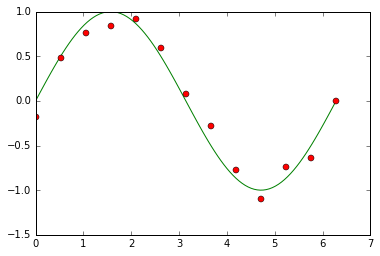

In [12]:
# plot sine wave
xx = np.linspace(0, 2*np.pi, 100);
plt.plot(xx, np.sin(xx), '-g');

# plot data
x = np.linspace(0, 2*np.pi, 13);
y = np.sin(x) + np.random.randn(x.shape[0]) / 5;
plt.plot(x,y, 'or');

$$y(x, w) = w_0 + w_1x + w_2 x^2 + \cdots + w_M x^M = \sum_{j=0}^M w_j x^j$$

## 0th Order Polynomial

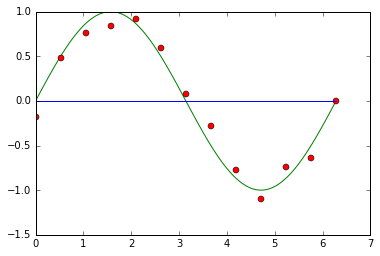

In [13]:
coeffs = np.polyfit(x, y, 0);
poly = np.poly1d(coeffs);
plt.plot(xx, np.sin(xx), "-g", x, y, "or", xx, poly(xx), "-b");

## 3rd Order Polynomial

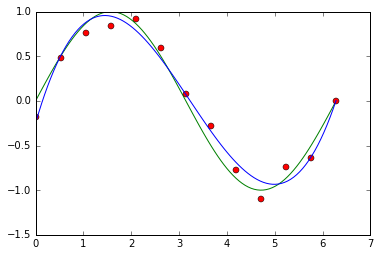

In [14]:
coeffs = np.polyfit(x, y, 3);
poly = np.poly1d(coeffs);
plt.plot(xx, np.sin(xx), "-g", x, y, "or", xx, poly(xx), "-b");

## 12th Order Polynomial

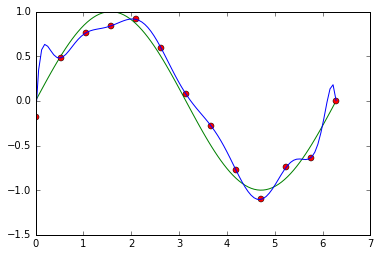

In [15]:
coeffs = np.polyfit(x, y, 12);
poly = np.poly1d(coeffs);
plt.plot(xx, np.sin(xx), "-g", x, y, "or", xx, poly(xx), "-b");

## Overfitting

<img src='images/overfitting.png' width=500px/>

Notes:  
1. X-axis: M, the degree of $\phi(\vec{x})$. Here means the order of the polynomial function.  
2. Y-axis: Root-Mean-Square (RMS) Error:  $E_{RMS} = \sqrt{2E(w^*) / N}$. This is only the rough estimation. 
3. When M increase, the training RMS goes down. However, the test RMS goes up dramatically! (overfitting)


## Polynomial Coefficients

![Polynomial Coefficients](images/polynomial-coefficients.png)  

Notes: When the M=9(overfitting), the coefficient goes crazy

## Data Set Size:  $N = 15$

(12th order polynomial)

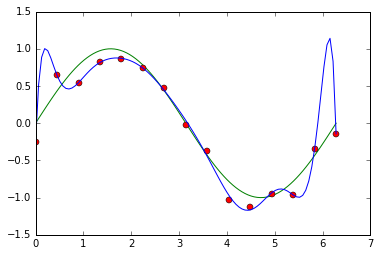

In [16]:
# sine wave
xx = np.linspace(0, 2*np.pi, 100);
# data
N = 15;
x = np.linspace(0, 2*np.pi, N);
y = np.sin(x) + np.random.randn(x.shape[0]) / 5;
# fit
coeffs = np.polyfit(x, y, 12);
poly = np.poly1d(coeffs);
plt.plot(xx, np.sin(xx), "-g", x, y, "or", xx, poly(xx), "-b");

## Data Set Size:  $N = 100$

(12th order polynomial)

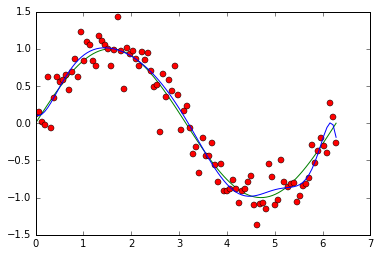

In [17]:
# sine wave
xx = np.linspace(0, 2*np.pi, 100);
# data
N = 100;
x = np.linspace(0, 2*np.pi, N);
y = np.sin(x) + np.random.randn(x.shape[0]) / 5;
# fit
coeffs = np.polyfit(x, y, 12);
poly = np.poly1d(coeffs);
plt.plot(xx, np.sin(xx), "-g", x, y, "or", xx, poly(xx), "-b");

# How do we choose the degree of our polynomial?

## Depends on the the size of your data set (Based on the 2 figures above.)
## The trade off parameter: $\lambda$ is used to trade off **model complexity** and **dataset size**

## Rule of Thumb

- For a small number of datapoints, use a low degree
    - Otherwise, the model will overfit!
- As you obtain more data, you can gradually increase the degree
    - Add more features to represent more data
    - **Warning:**  Your model is still limited by the finite amount of data available.  The optimal model for finite data cannot be an infinite-dimensional polynomial!)
- Use **regularization** to control model complexity.

# Regularized Linear Regression

## Regularized Least Squares

- Consider the error function $E_D(w) + \lambda E_W(w)$
    - Data term $E_D(w)$
    - Regularization term $E_W(w)$
    - $E_W(w)$ can restrict the size of w (i.e M). From the formula below, we can see when the M goes too large the data term $E_D(w)$ would goes small, but the regulation term $E_W(w)$ would go up.
    - $\lambda$ is a paremeter you gotta tune
- With the sum-of-squares error function and quadratic regularizer,
    $$
    \widetilde{E}(w)
    = \frac12 \sum_{n=1}^N (y(x_n, w) - t_n)^2
    + \boxed{\frac{\lambda}{2} || w ||^2}
    $$
- This is minimized by
    $$
    w = (\lambda I + \Phi^T \Phi)^{-1} \Phi^T t
    $$
    
$$
\Phi = \begin{bmatrix}
\phi_0(\vec{x}_1) & \phi_1(\vec{x}_1) & \cdots & \phi_{M-1}(\vec{x}_1) \\
\phi_0(\vec{x}_2) & \phi_1(\vec{x}_2) & \cdots & \phi_{M-1}(\vec{x}_2) \\
\vdots & \vdots & \ddots & \vdots \\
\phi_0(\vec{x}_N) & \phi_1(\vec{x}_N) & \cdots & \phi_{M-1}(\vec{x}_N) \\
\end{bmatrix}
$$

- Sometimes this $$
    w = (\lambda I + \Phi^T \Phi)^{-1} \Phi^T t
    $$ is called ridge regression

## Regularized Least Squares:  Derivation

Recall that our objective function is
    $$
    E(w)
    =\frac12 \sum_{n=1}^N (w^T \phi(x^{(n)}) - t^{(n)})^2
     + \frac{\lambda}{2} w^T w \\
    = \frac12 w^T \Phi^T \Phi w - w^T \Phi^T t + \frac12 t^T t + \frac{\lambda}{2} w^T w
    $$
    
$$
\Phi = \begin{bmatrix}
\phi_0(\vec{x}_1) & \phi_1(\vec{x}_1) & \cdots & \phi_{M-1}(\vec{x}_1) \\
\phi_0(\vec{x}_2) & \phi_1(\vec{x}_2) & \cdots & \phi_{M-1}(\vec{x}_2) \\
\vdots & \vdots & \ddots & \vdots \\
\phi_0(\vec{x}_N) & \phi_1(\vec{x}_N) & \cdots & \phi_{M-1}(\vec{x}_N) \\
\end{bmatrix}
$$

## Regularized Least Squares:  Derivation

Compute gradient and set to zero:
    $$
    \begin{align}
    \nabla_w E(w)
    &= \nabla_w \left[ 
           \frac12 w^T \Phi^T \Phi w - w^T \Phi^T t + \frac12 t^T t 
           + \frac{\lambda}{2} w^T w
       \right] \\
    &= \Phi^T \Phi w - \Phi^T t + \lambda w \\
    &= (\Phi^T \Phi + \lambda I) w - \Phi^T t = 0
    \end{align}
    $$

Therefore, we get $\boxed{w_{ML} = (\Phi^T \Phi + \lambda I)^{-1} \Phi^T t}$. Also, $w_{ML}=(\Phi^T \Phi + \lambda I)^{-1} \Phi^T t$ ensures $w_{ML}$ is invertible and positive definite

## Regularized Least Squares:  Norms

We can make use of the various $L_p$ norms for different regularizers:

$$
\widetilde{E}(w)
= \frac12 \sum_{n=1}^N (t_n - w^T \phi(x_n))^2
+ \frac{\lambda}{2} \sum_{j=1}^M |w_j|^q
$$

![Norms](images/p-norms.png)

## Regularized Least Squares:  Comparison

Lasso tends to generate sparser solutions than a quadratic regularizer.

![Regularization](images/lasso-vs-ridge.png)  

Note: 
1. when q=1, we can see the value of x-axis is zero!! This is also the property the Lasso L1 regularization. (L1 Lasso might force lots of coefficient $w_i$ equals to zero)
2. The upper-right blue dot is the original optimization without regularization and the $w^*$ is the optimization point after adding regularization term. (By lagrange)

## L2 Regularization:  $\ln\lambda = -18$ 
**$\ln\lambda = -18$ means the $\lambda = e^{-18}$, which is relative small value!**

![L2 Regularization](images/l2-reg-lambda-18.png)

## L2 Regularization:  $\ln\lambda = 0$
**$\lambda = 1$ and is relatively huge. From the figure below, we can see the fitted line is underfitting and we can say it is over regularizing!**


![L2 Regularization](images/l2-reg-lambda-0.png)

## L2 Regularization:  $E_{RMS}$ vs $\ln\lambda$

![E_RMS vs ln(lambda)](images/l2-reg-erms-vs-lambda.png)

> NOTE: For simplicity of presentation, we divided the data into training set and test set. However, it’s not legitimate to find the optimal hyperparameter based on the test set. We will talk about legitimate ways of doing this when we cover model selection and cross-validation.
> NOTE: less reularization $\implies$ less training error. However, less reularization does **NOT** imply less test error

## L2 Regularization:  Polynomial Coefficients

![Polynomial Coefficients](images/l2-reg-coeffs.png)

- $\ln \lambda=-\infty \implies \lambda = 0 \implies$ no regularization term! $\implies$ over-fitting
- $\ln \lambda=0 \implies \lambda = 1 \implies$ regularization term dominant data term!! $\implies$ under-fitting (since we regularization term is dominant, the value of regulariztion term is way bigger than data term, which mean we can omit the data term. Therefore, we would get the $w_i=0$)

## Regularized Least Squares:  Summary

- Simple modification of linear regression
- L2 Regularization controls the tradeoff between *fitting error* and *complexity*.
    - Small L2 regularization results in complex models, but with risk of overfitting
    - Large L2 regularization results in simple models, but with risk of underfitting
- It is important to find an optimal regularization that *balances* between the two